**COMP3670/6670 Tutorial Week 8**
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



-----------

   **TASK 1: linear regression with gradient descent.** 
   
   1. Randomly generate a matrix $X \in \mathbb{R}^{N \times D}$, where each row of $X$ is a training example.
   2. Choose a vector $t \in \mathbb{R}^{D \times 1}$.
   3. Generate $Y$ by $Xt = Y$.
   4. Then generate a random matrix $\theta \in \mathbb{R}^{D \times 1}$.
   5. Implement gradient descent to find the maximum likelihood estimate $\theta$.
   6. Check your gradient descent algorithm correctly approximated $t$. Talk to your classmates and tutor to make sure if you're unsure.
   7. Verify your answer with the closed form solution employing the Moore-Penrose inverse.
   
Note that in the above we're essentially pretending we don't know $t$. Obviously, if we have $t$, linear regression with gradient descent would be unnecessary, but the point is to help you understand what gradient descent is doing.

Also note: we should use the squared loss function, computed as the square of the difference between the predicted function values and the observed function values (or ground truth). $D$ and $N$ can be any number you like, but be reasonable.


-----------
 

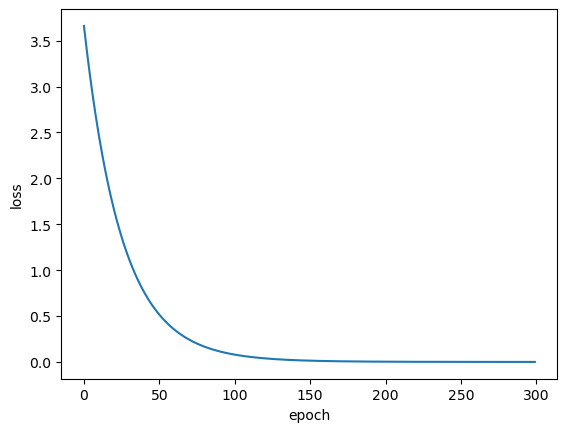

Analytic Solution:
 [[ 0.40781115]
 [ 1.86199211]
 [-1.22807036]]
Gradient Descent Solution:
 [[ 0.39520962]
 [ 1.85669698]
 [-1.22769278]]
t:
 [[ 0.40781115]
 [ 1.86199211]
 [-1.22807036]]


In [2]:
# set N, D
N = 200
D = 3

# generate data
X = np.random.randn(N, D)  # step 1 (What does randn do?)
t = np.random.randn(D, 1)  # step 2
Y = X @ t # step 3
theta = np.random.randn(D, 1)  # step 4

# gradient descent 
epoch = 300 # number of steps
lr = 0.01 # learning rate
loss_trace = []
for _ in range(epoch):
    # for record
    loss = (Y - X @ theta).T @ (Y - X @ theta) / N
    loss_trace.append(loss.item())
    # update
    gradient = (-2 * Y.T @ X + 2 * theta.T @ X.T @ X) / N
    theta = theta - lr * gradient.T

# plot
plt.plot(loss_trace)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# check
theta_closed_form = np.linalg.inv(X.T @ X) @ X.T @ Y
print("Analytic Solution:\n", theta_closed_form)
print("Gradient Descent Solution:\n", theta)
print("t:\n", t)


-----------
**Task 2:** We investigate various factors in linear regression 

1. noise. When collecting real-world data, it is common that there would be measurement noise included. Adding noise to your generated data and see how this would influence the parameter estimation. You can add noise by settting $Y=Xt+\pmb\epsilon$ where $\epsilon_n \sim \mathcal{N}(\mu,\sigma^2)$.

2. learning rate. How would the learning rate influence the convergence of the optimization process?

-----------

In [3]:
#Create a reusable function
def gradient_descent(X, Y, epoch, lr):
    N = X.shape[0]
    theta = None#Your code goes here
    loss = []
    for _ in range(epoch):
        loss.append([])#Your code goes here
        theta = []#Your code goes here
    return theta, loss

In [8]:
# noise
N = 200
D = 3
X = np.random.randn(N, D)
t = np.random.randn(D, 1)
Y = X @ t
Y_tilde = X @ t + np.random.randn(N,1) #Noisy. What is the noise here?

epoch = 0 #Set a value here
lr = 0 #Set a value here

theta_1, _ = gradient_descent(X, Y, epoch=epoch, lr=lr) # without noise
theta_2, _ = gradient_descent(X, Y_tilde, epoch=epoch, lr=lr) # with noise

if theta_1 and theta_2 is not None:
    a = theta_1 - t
    b = theta_2 - t
else:
    a,b = theta_1,theta_2

print("Euclidean Distance:")
print("without noise\t", np.linalg.norm(a))
print("noise\t\t", np.linalg.norm(b))
print("Gradient Descent Solution")
print("without noise：\n", theta_1)
print("with noise：\n", theta_2)
print("t:\n", t)

Euclidean Distance:


TypeError: unsupported operand type(s) for *: 'NoneType' and 'NoneType'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


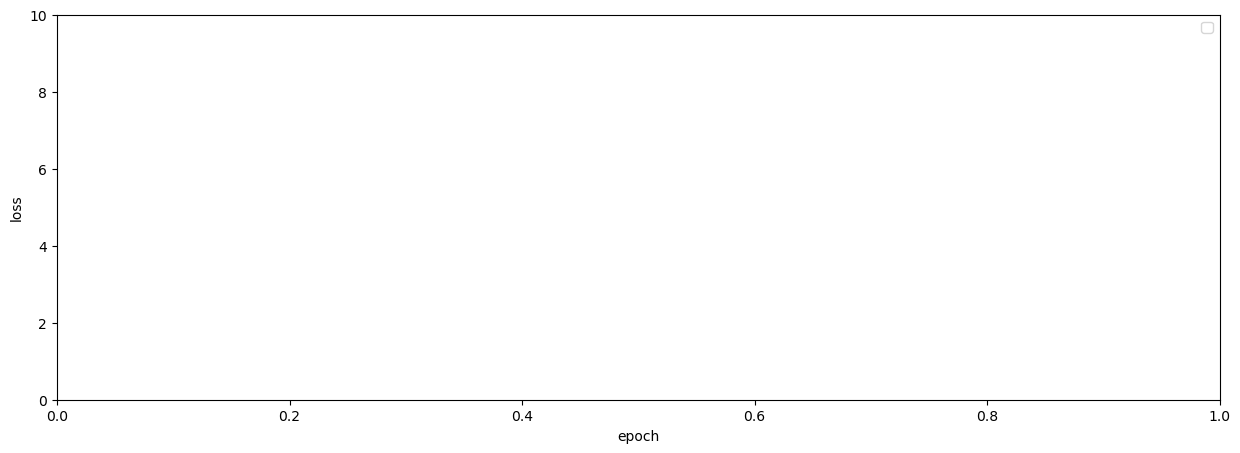

In [9]:
# learning rate
N = 100
D = 3
X = np.random.randn(N, D)
Y = X @ np.random.randn(D, 1)

# training
#Try with different lr = 1, 10^-1, 10^-2, 10^-3...
loss_record = {}
for i in range(4):# your can try more
    lr = 0#Set your value here
    _, loss = gradient_descent(X, Y, epoch=300, lr=lr)
    loss_record[str(lr)] = np.array(loss)
    
# plot
fig=plt.figure(figsize=(15,5))
for i in []:#Plot for all your lr values
    lr = 0#Set your value here
    plt.plot(loss_record[str(lr)], label='lr='+str(lr))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0,10])
plt.legend()
plt.show()

-----------

**Task 3: Principle Component Analysis**

Let us first generate a 2D dataset.

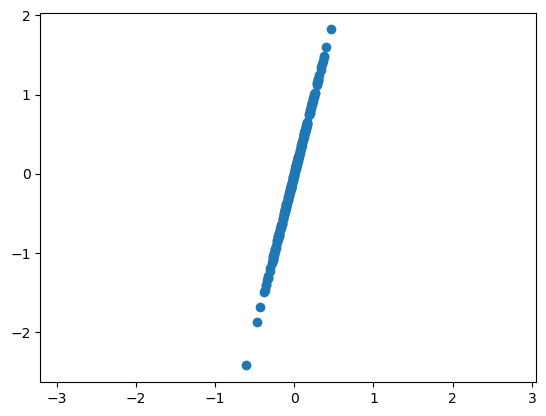

In [10]:
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');


There appears to be a nearly linear relationship between the two feature dimensions variables.
Unlike linear regression, PCA attempts to learn about the *relationship* between the *x* and *y* values.

Using Scikit-Learn `PCA` estimator, we can compute this as follows:

In [15]:
pca = PCA(n_components=2) #Try calling scikitlearn PCA with 2 components
pca.fit(X)

PCA(n_components=2)

In [16]:
print("Components:", pca.components_)
print("Variances:", pca.explained_variance_) #What are these properties? Explore the pca object

Components: [[-0.24478151 -0.96957826]
 [-0.96957826  0.24478151]]
Variances: [6.13439561e-01 2.06119985e-07]


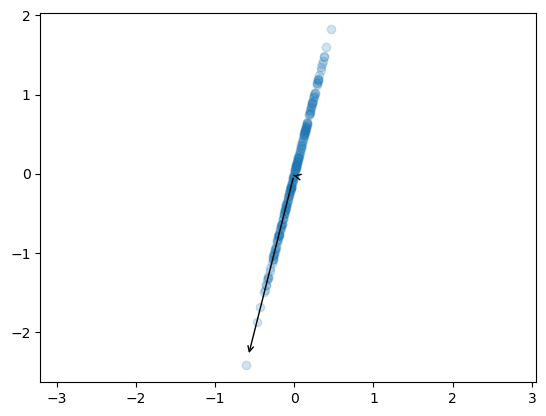

In [17]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    plt.gca().annotate('', pca.mean_, pca.mean_ + vector * 3 * np.sqrt(length), arrowprops=dict(arrowstyle='<-'))
plt.axis('equal');